In [3]:
from matplotlib.patches import Ellipse
import tensorflow as tf
import tensorflow_probability as tfp
from keras.models import Sequential, Model
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten,Reshape
tfd = tfp.distributions
from keras.models import Sequential 
model = Sequential()
from keras import models
tfb = tfp.bijectors
tfpl = tfp.layers
tfb = tfp.bijectors

import numpy as np
import matplotlib.pyplot as plt 
print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.6.0
TFP version: 0.14.0


the Kullback-Leibler divergence between them is defined as

\begin{equation}
    D_{KL}\big[q \ || \ p\big] =\begin{cases}
                                        \text{E}_{X\sim q}\big[
                                           \log q(X) - \log p(X)\big] &\text{if } p(x) = 0 \implies q(x) = 0,\\
                                        \infty &\text{otherwise.}
                                       \end{cases}
\end{equation}


In [5]:
tf.random.set_seed(41)

In [7]:
p_mu = [0.,0.]
p_l = tfb.Chain([tfb.TransformDiagonal(tfb.Softplus()),
                tfb.FillTriangular()])(tf.random.uniform([3]))
tfd.MultivariateNormalTriL(loc = p_mu, scale_tril=p_l)



<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[] event_shape=[2] dtype=float32>

In [8]:
tf.random.set_seed(41)

In [9]:
q = tfd.MultivariateNormalDiag(loc = tf.Variable
                              (tf.random.normal([2])),
                               scale_diag=tfp.util.TransformedVariable(tf.random.uniform([2]),
                                                                      bijector = tfb.Exp()))

In [11]:
@tf.function
def loss_grads(dist_a, dist_b):
    with tf.GradientTape() as tape:
        loss = tfd.kl_divergence(dist_a,dist_b)
        
    return loss, tape.gradient(loss, dist_a.trainable_variables)


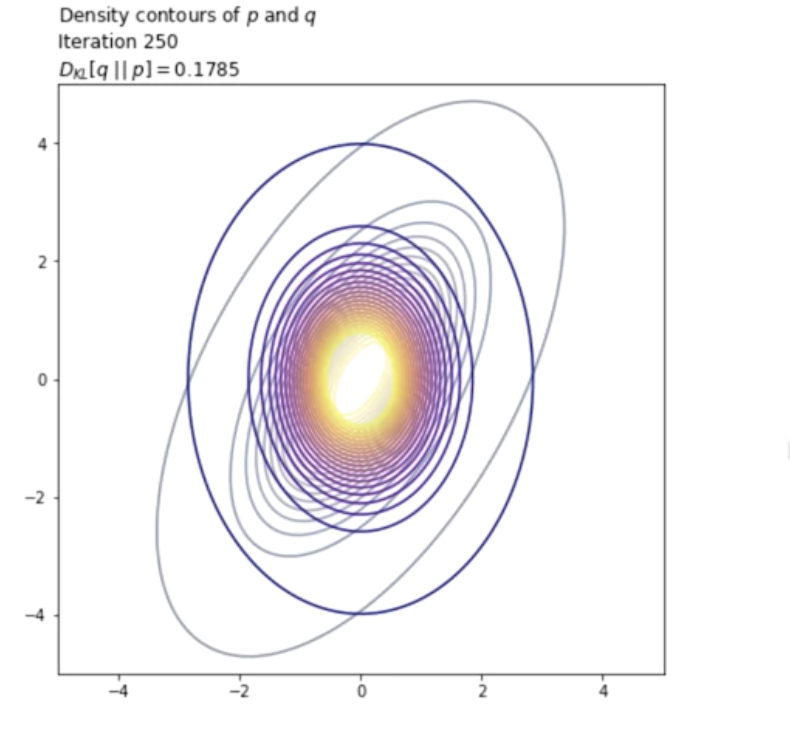

In [12]:
@tf.function
def loss_grads(dist_a, dist_b, reverse = False):
    with tf.GradientTape() as tape:
        if not reverse:
            
            loss = tfd.kl_divergence(dist_a,dist_b)
        else:
            loss = tfd.kl_divergence(dist_b, dist_a)
    return loss, tape.gradient(loss, dist_a.trainable_variables)



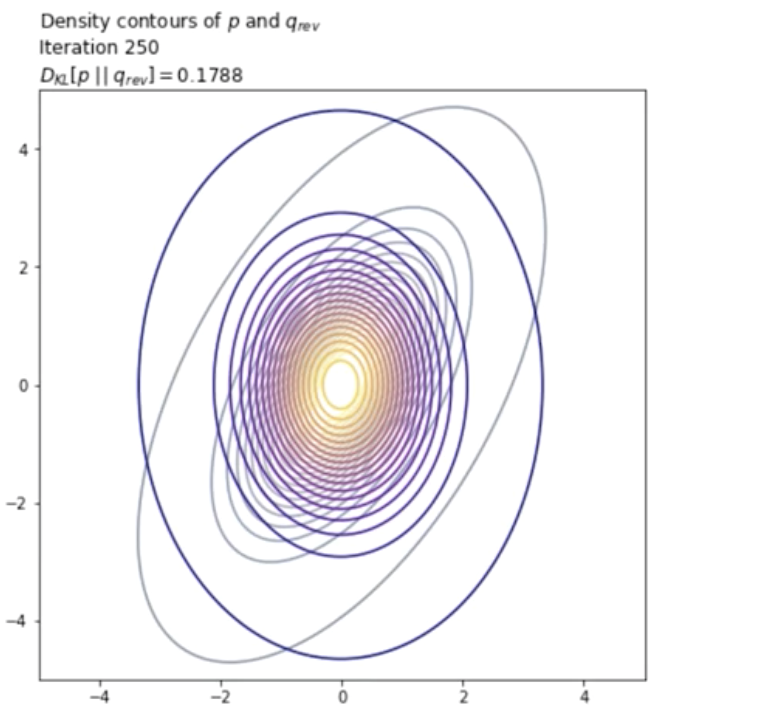

# Comparing the two p and q, and its reverse

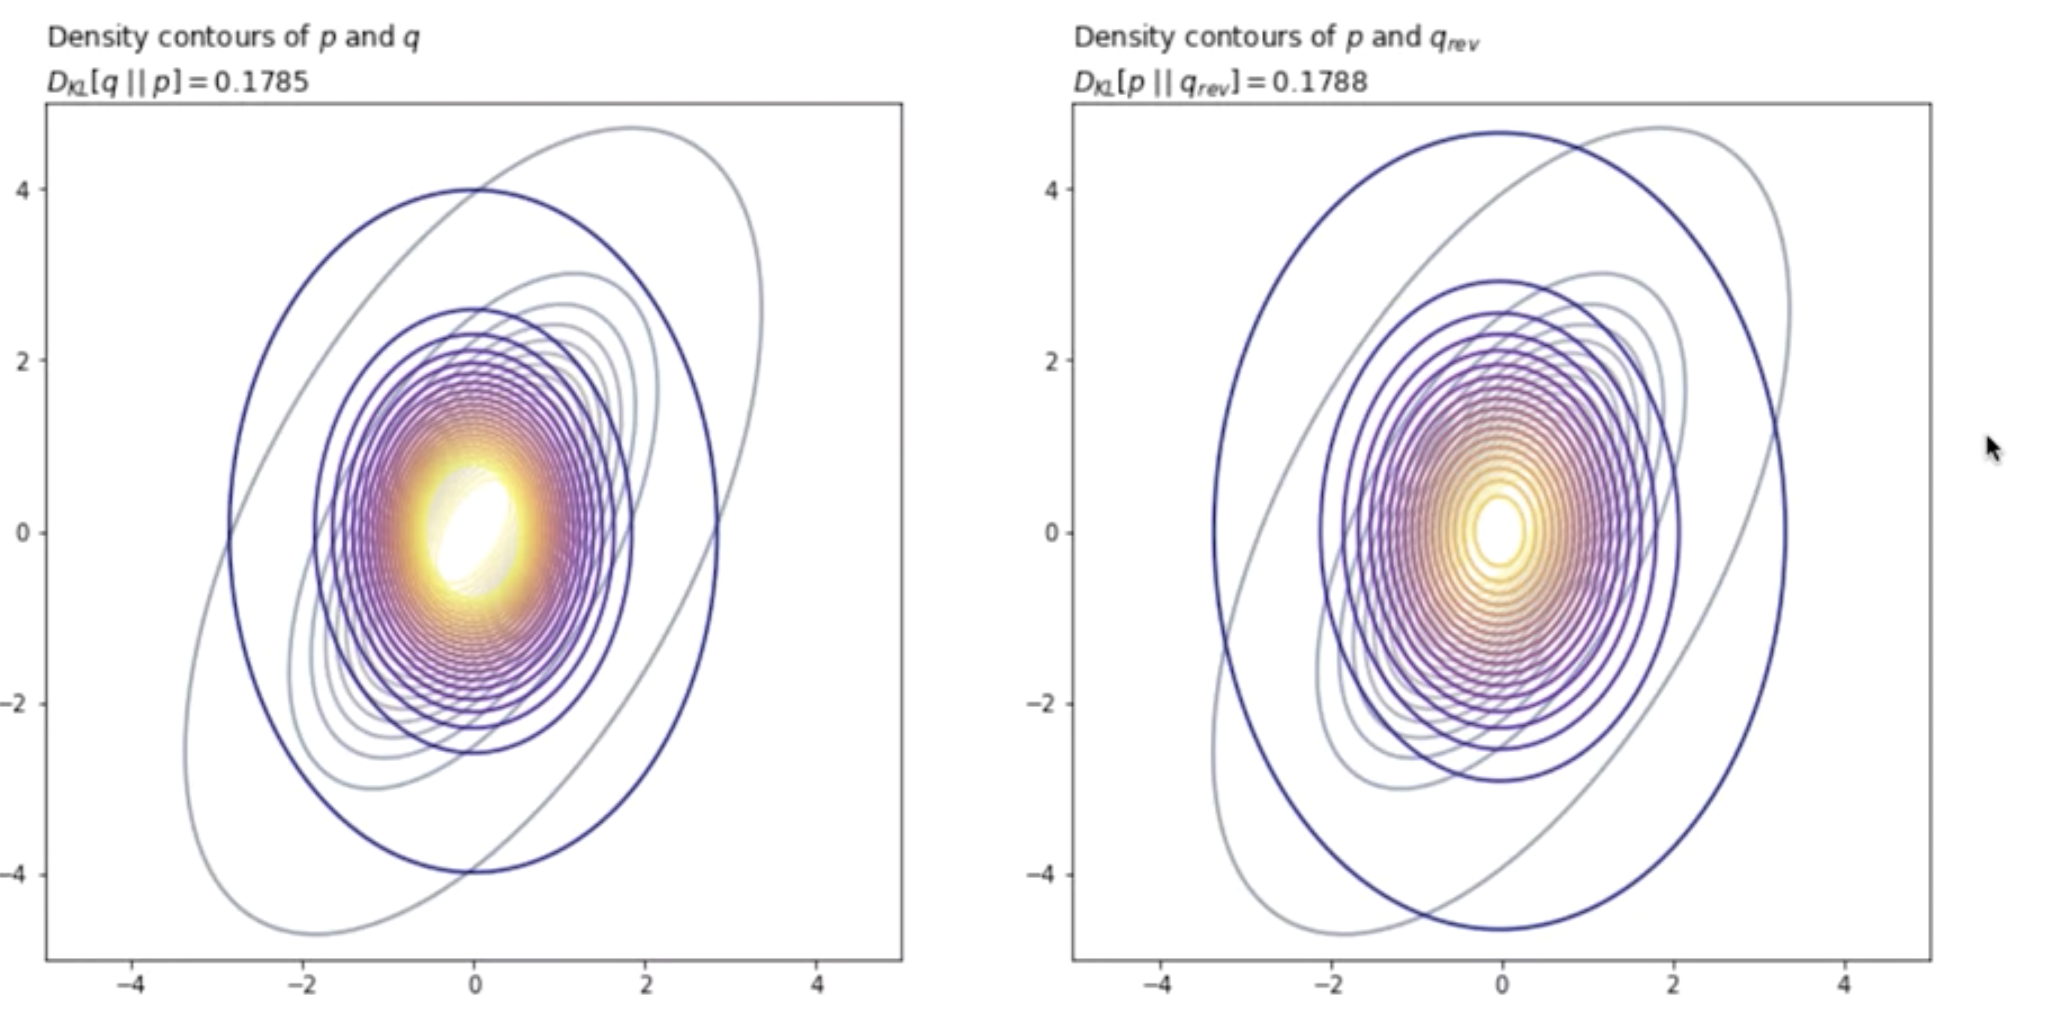